In [34]:
from collections import Counter 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from matplotlib import colors
import cv2

In [22]:
def rgb_to_hex(color):
    hex_color = "#"
    for i in color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [23]:
rgb_to_hex([255, 0, 0])

'#ff0000'

In [24]:
img_1 = "img/flowers.jpg"
img_2 = "img/aesthetic.png"
raw_img = cv2.imread(img_1)
raw_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)
# raw_img2 = cv2.imread(img_2)
# raw_img2 = cv2.cvtColor(raw_img2, cv2.COLOR_BGR2RGB)

In [25]:
img = cv2.resize(raw_img, (900, 600), interpolation=cv2.INTER_AREA)
img.shape

(600, 900, 3)

In [26]:
img = img.reshape(img.shape[0] * img.shape[1], 3)
img.shape

(540000, 3)

In [27]:
img

array([[245, 198, 214],
       [242, 199, 213],
       [237, 202, 214],
       ...,
       [ 40,   7,  55],
       [105,  64, 116],
       [123,  77, 128]], dtype=uint8)

In [28]:
clf = KMeans(n_clusters=5)
color_label = clf.fit_predict(img)
color_label.shape
center_colors = clf.cluster_centers_


In [29]:
color_label

array([2, 2, 2, ..., 0, 4, 3])

In [30]:
center_colors

array([[ 40.37956485,  16.91883491,  32.92042746],
       [184.46891297, 143.56647473, 183.06383522],
       [237.26465592, 209.87721233, 221.93075207],
       [134.28964426,  87.39259493, 145.516105  ],
       [ 93.842282  ,  35.22755421,  93.31403178]])

In [31]:
counts = Counter(color_label)
counts

Counter({2: 78516, 1: 125085, 3: 130659, 4: 114901, 0: 90839})

In [32]:
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
hex_colors 

['#865791', '#b88fb7', '#5d235d', '#281020', '#edd1dd']

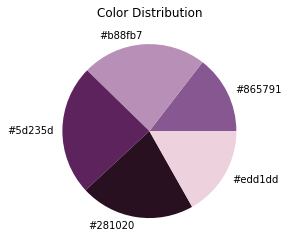

In [35]:
def show_colors_in_a_pie_chart(hex_colors):
    plt.pie(counts.values(), labels=hex_colors, colors=hex_colors)
    plt.title("Color Distribution")
    plt.show()

show_colors_in_a_pie_chart(hex_colors)